<a href="https://colab.research.google.com/github/mthaugusto/forest-fires-in-brazil-data-analysis/blob/main/An%C3%A1lise_Explor%C3%A1t%C3%B3ria_de_Dados_Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET - FOREST FIRES IN BRAZIL
### Número de incêndios florestais registrados no Brasil no período entre os anos de 1998 e 2017. Dados obtidos do site oficial do governo brasileiro.


Kaggle: https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil

Fonte: http://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif

Dataset por Luís Gustavo Modelli

## Informações para extrairmos do conjunto de dados:

- Exibir as 5 primeiras linhas do conjunto de dados
- Exibir as 5 últimas linhas do conjunto de dados
- Número total de linhas e colunas do conjunto de dados
- Obtendo informações gerais sobre o nosso conjunto de dados
- Eliminando dados duplicados
- Eliminando valores nulos
- Em que mês foi registrado o maior número de incêndios?
- Em que ano foi registrado o maior número de incêndios?
- Em que estado foi relatado o maior número de incêndios florestais?
- Encontrando o número total de incêndios florestais registrados no estado de Amazonas
- Encontrando o número total de incêndios florestais registrados no estado de Amazonas (por ano)
- Encontrando o número total de incêndios relatados em 2015 e visualizando os dados com base em cada mês
- Visualizar o número médio de incêndios relatados, do mais alto para o mais baixo (por estado)
- Encontrando os estados onde foram relatados incêndios no mês de dezembro

## Importando as bibliotecas necessárias para a análise

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carregando o dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/amazon.csv", sep=",", encoding="iso-8859-1")

## Exibindo as 5 primeiras linhas do conjunto de dados

In [ ]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


## Exibindo as 5 últimas linhas do conjunto de dados

In [ ]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


### Número total de linhas e colunas do conjunto de dados

In [ ]:
data.shape

(6454, 5)

In [ ]:
print(f"Número de linhas: {data.shape[0]}")
print(f"Número de colunas: {data.shape[1]} ")

Número de linhas: 6454
Número de colunas: 5 


### Obtendo informações gerais sobre o nosso conjunto de dados

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [ ]:
data.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


### Verificando e eliminando dados duplicados

In [ ]:
data_dup = data.duplicated().any()

In [ ]:
print(f"O conjunto de dados possui valores duplicados (true/false): {data_dup} ")

O conjunto de dados possui valores duplicados (true/false): True 


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(6422, 5)

### Verificando e eliminando valores nulos

In [ ]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
# Se você quiser remover apenas linhas onde todos os valores são nulos, pode usar o parâmetro 'how'
# data_sem_nulos = data.dropna(how='all')

# Se você quiser remover apenas linhas onde uma determinada coluna tem valor nulo, pode usar o parâmetro 'subset'
# data_sem_nulos = data.dropna(subset=['nome_da_coluna'])


In [ ]:
data.shape

(6422, 5)

### Em que mês foi registrado o maior número de incêndios?

In [ ]:
data.columns


Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [ ]:
incendios_por_mes = data.groupby('month')['number'].sum().reset_index()
incendios_por_mes

,month,number
0,Abril,28184.770
1,Agosto,88050.435
2,Dezembro,57535.480
3,Fevereiro,30839.050
4,Janeiro,47681.844
5,Julho,92319.113
6,Junho,55997.675
7,Maio,34725.363
8,Março,30709.405
9,Novembro,85508.054


<Axes: xlabel='month', ylabel='number'>

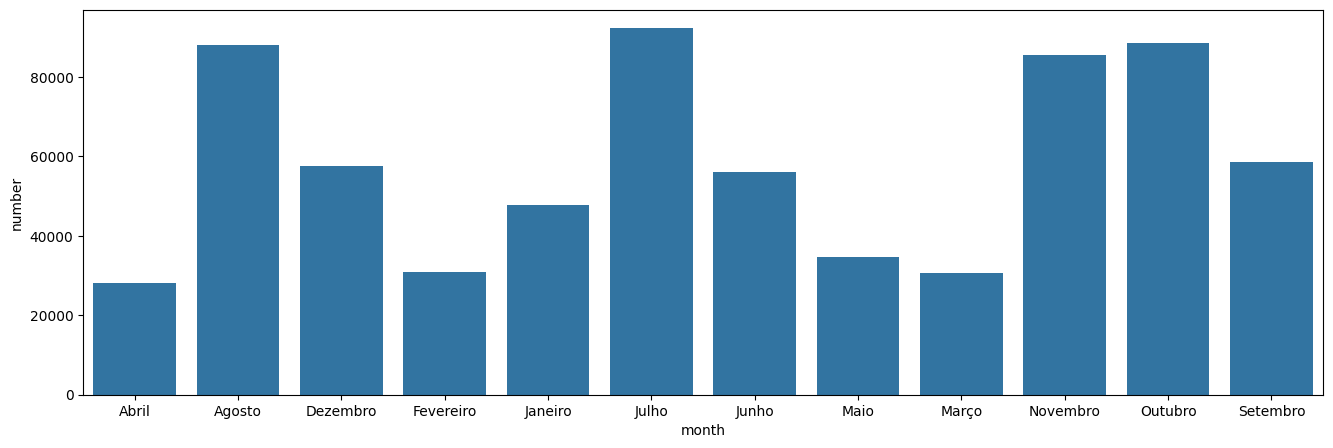

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x="month", y="number", data=incendios_por_mes)

### Em que ano foi registrado o maior número de incêndios?

In [ ]:
incendios_por_ano = data.groupby('year')['number'].sum().reset_index()
incendios_por_ano

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

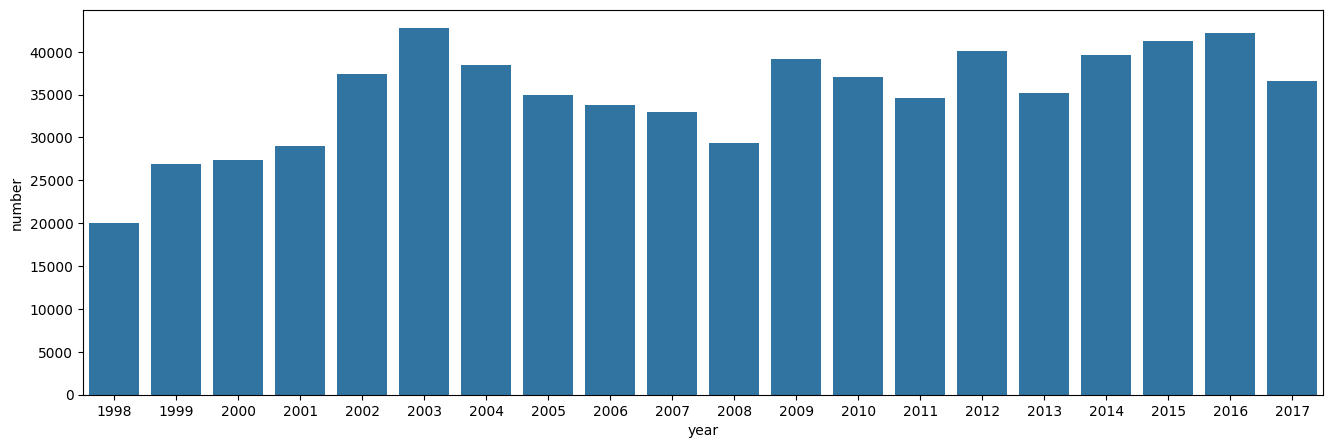

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x="year", y="number", data=incendios_por_ano)

### Em que estado foi relatado o maior número de incêndios florestais?

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [ ]:
incendios_por_estado = data.groupby('state')['number'].sum().reset_index()
incendios_por_estado

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


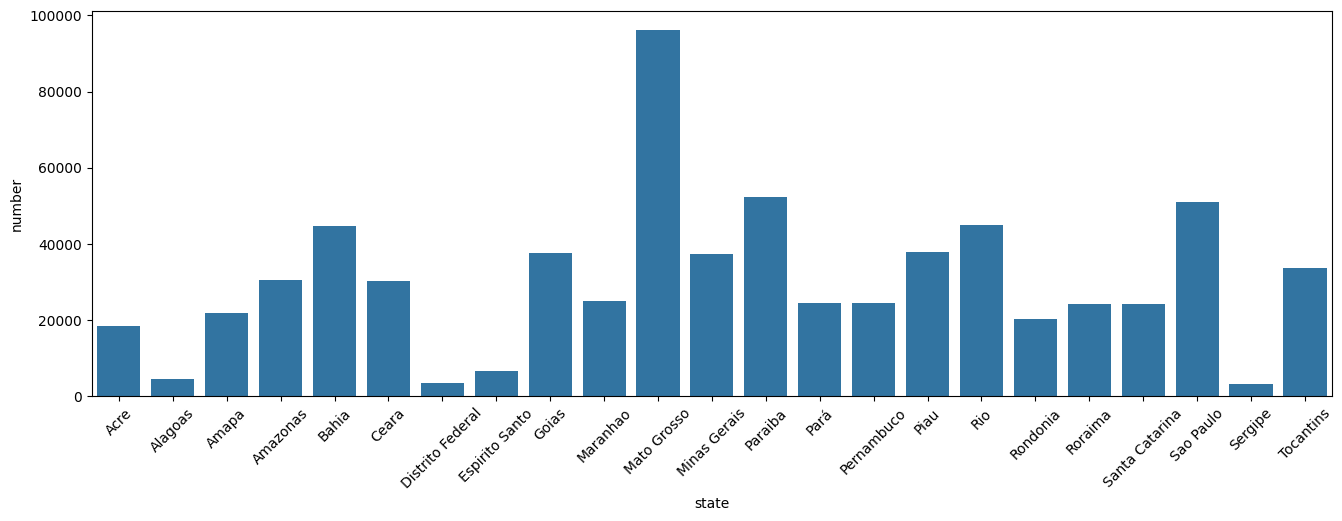

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x="state", y="number", data=incendios_por_estado)
plt.xticks(rotation=45)
plt.show()

In [ ]:
incendios_por_estado_ordenado = incendios_por_estado.sort_values(by='number', ascending=False)

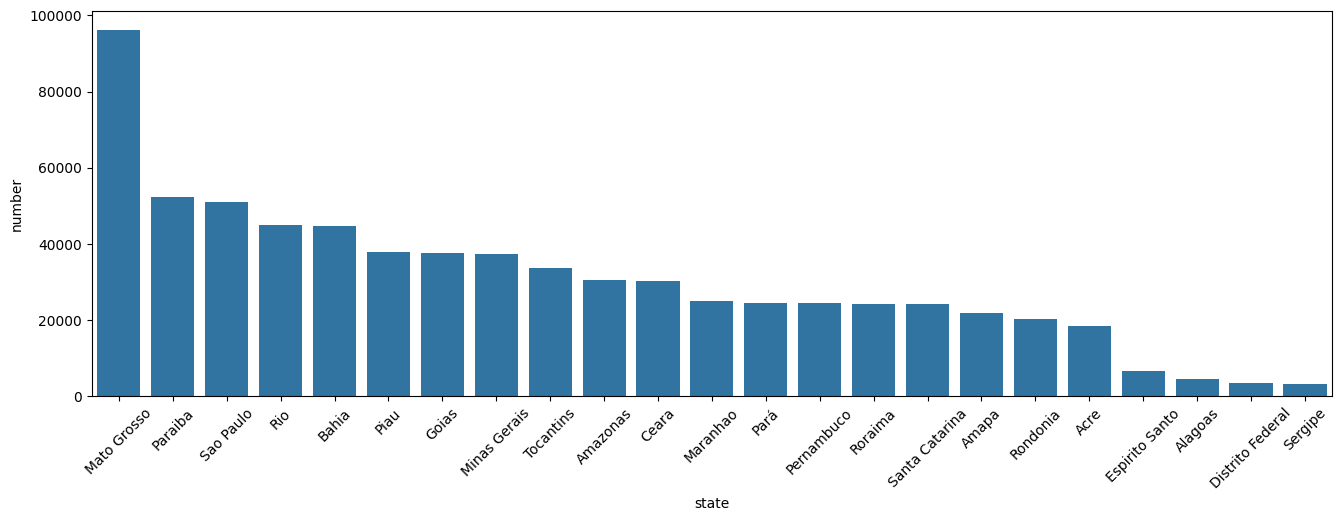

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x="state", y="number", data=incendios_por_estado_ordenado)
plt.xticks(rotation=45)
plt.show()

### Encontrando o número total de incêndios florestais registrados no estado de Amazonas

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [ ]:
amazonas_cont = data['state'].value_counts()['Amazonas']
amazonas_cont

239

In [ ]:
amazonas_data = data[data['state'] == 'Amazonas']

In [ ]:
amazonas_data['number'].sum()

30650.129

### Encontrando o número total de incêndios florestais registrados no estado de Amazonas (por ano).

In [ ]:
amazonas_por_ano = amazonas_data.groupby('year')['number'].sum().reset_index()
amazonas_por_ano

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

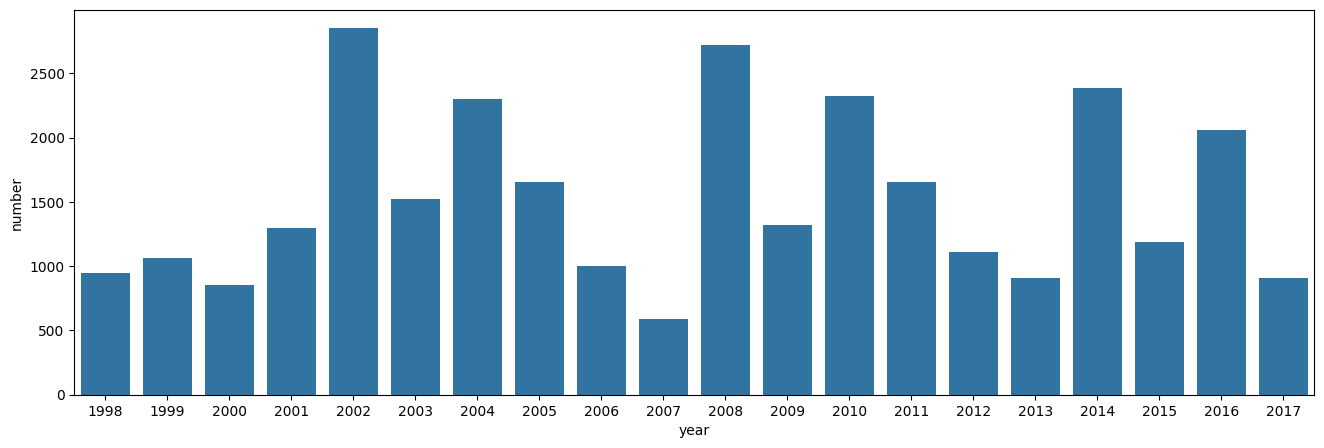

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x="year", y="number", data=amazonas_por_ano)

### Encontrando o número total de incêndios relatados em 2015 e visualizando os dados com base em cada mês.

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [ ]:
incendios_2015 = data[data['year']==2015].groupby('month')['number'].sum().reset_index()
incendios_2015

,month,number
0,Abril,2573.000
1,Agosto,4363.125
2,Dezembro,4088.522
3,Fevereiro,2309.000
4,Janeiro,4635.000
5,Julho,4364.392
6,Junho,3260.552
7,Maio,2384.000
8,Março,2202.000
9,Novembro,4034.518


<Axes: xlabel='month', ylabel='number'>

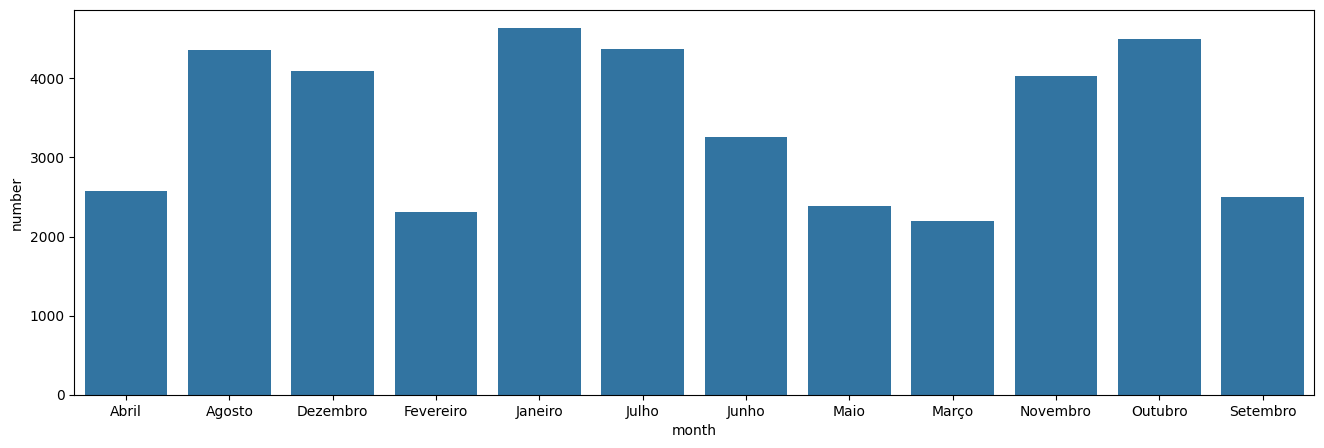

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x="month", y="number", data=incendios_2015)

### Visualizar o número médio de incêndios relatados, do mais alto para o mais baixo (por estado)

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [ ]:
media_incendios_por_estado = data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
media_incendios_por_estado

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


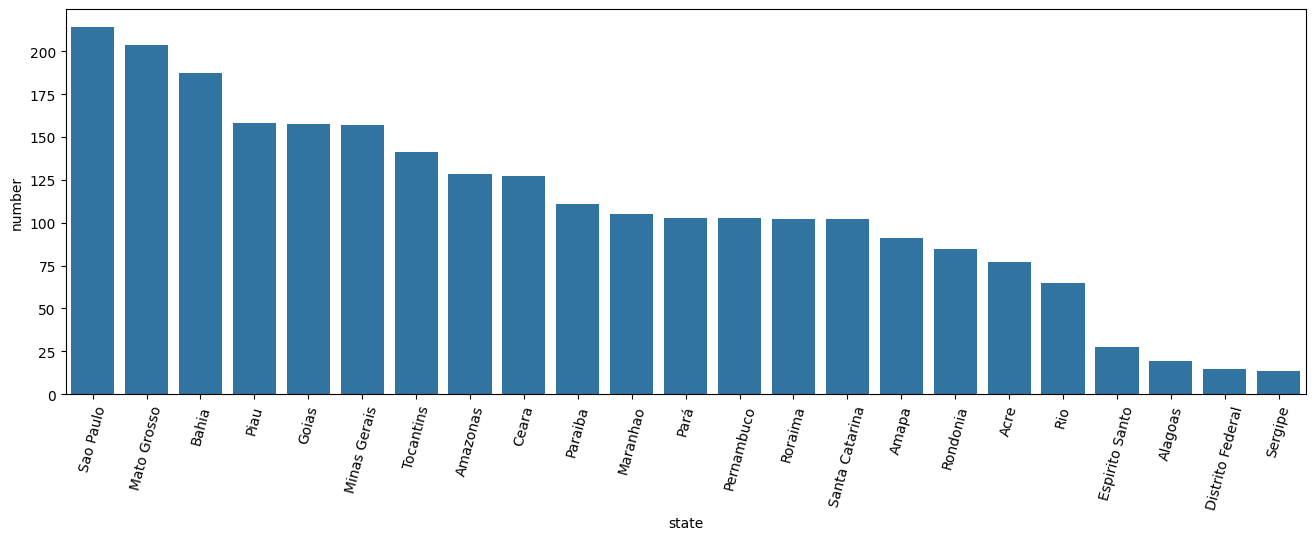

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x='state', y='number', data=media_incendios_por_estado)
plt.xticks(rotation=75)
plt.show()

### Encontrando os estados onde foram relatados incêndios no mês de dezembro


In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [ ]:
estados_com_incendios_dez = data[data['month']=="Dezembro"]['state'].unique()
estados_com_incendios_dez

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [ ]:
print(len(estados_com_incendios_dez))

23
